Train specified model.

LSTM model architecture and design inspired by [Alcantara et al.](https://peerj.com/articles/12752)

# Input parameters here

In [1]:
# # PARAMETERS # #
BASE_DIR = '/content/drive/My Drive/CS230_FinalReport/' # your base directory
EXP_TYPE = 'with_physicsinputs'

# Hyperparameters:
LSTM_NODES = 448
DROPOUT_RATE = 0.5
LEARNING_RATE = 0.01

MASK_VALUE = 999.
MAX_TIMESTEPS = 112
if EXP_TYPE == 'with_physicsinputs': NUM_INPUT_FEATS = 36
if EXP_TYPE == 'without_physicsinputs': NUM_INPUT_FEATS = 28
NUM_OUTPUT_FEATS = 28
MODEL_FILENAME = '/content/drive/My Drive/CS230_FinalReport/models/' + EXP_TYPE + '_lstm_newoutputs_transformfix_rawdist_tunedparams_rotonly' # where you want to save the model to
BATCH_SIZE = 32
EPOCHS = 100

SEED = 43
# # # # # # # # # #

# Load libraries and data

In [2]:
# Mount Drive to access data.
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
# Library imports
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import numpy as np
import os

# To import own model modules
import sys
sys.path.insert(0, (os.path.join(BASE_DIR, 'src/models')))
from train_model_utils_lstm_newoutputs import *

In [4]:
# Set the random seed
keras.utils.set_random_seed(SEED)

In [5]:
# Load in train, dev, arrays.
datadir = os.path.join(BASE_DIR, 'data', 'processed', 'normalized')

X_train = np.load(file=os.path.join(datadir, EXP_TYPE, 'X_train_norm_100Hz_RawDist.npy'), allow_pickle=True)
Y_train = np.load(file=os.path.join(datadir, EXP_TYPE, 'Y_train_norm_100Hz_RawDist.npy'), allow_pickle=True)
X_dev = np.load(file=os.path.join(datadir, EXP_TYPE, 'X_dev_norm_100Hz_RawDist.npy'), allow_pickle=True)
Y_dev = np.load(file=os.path.join(datadir, EXP_TYPE, 'Y_dev_norm_100Hz_RawDist.npy'), allow_pickle=True)

# Check sizes
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"X_dev: {X_dev.shape}")
print(f"Y_dev: {Y_dev.shape}")

# Separate out targets for different outputs
Y_train_cont  = Y_train[:,:,0:20]
Y_train_class = Y_train[:,:,20:22]
Y_train_dist  = Y_train[:,:,22:]

Y_dev_cont  = Y_dev[:,:,0:20]
Y_dev_class = Y_dev[:,:,20:22]
Y_dev_dist  = Y_dev[:,:,22:]

X_train: (5949, 112, 36)
Y_train: (5949, 112, 28)
X_dev: (820, 112, 36)
Y_dev: (820, 112, 28)


# Train the model

In [6]:
# Call build model with selected parameters.

model = build_model(
    NUM_TIMESTEPS = MAX_TIMESTEPS,
    NUM_INPUT_FEATS = NUM_INPUT_FEATS,
    NUM_OUTPUT_FEATS = NUM_OUTPUT_FEATS,
    NUM_OUT_CONT = Y_train_cont.shape[-1],
    NUM_OUT_CLASS = Y_train_class.shape[-1],
    NUM_OUT_DIST = Y_train_dist.shape[-1],
    MASK_VALUE = MASK_VALUE,
    lstm_nodes = LSTM_NODES,
    lstm_act = 'tanh',
    dropout_rate = DROPOUT_RATE,
    learning_rate = LEARNING_RATE)

# Print a summary of the model's layers and all the parameters.
model.summary()

Model: "LSTM"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 36)]    0           []                               
                                                                                                  
 masking (Masking)              (None, 112, 36)      0           ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 112, 448)     1738240     ['masking[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 112, 448)     0           ['bidirectional[0][0]']          
                                                                                               

In [7]:
# Train the model, and get the fit history.

fit_history = train_model(model,
                          MODEL_FILENAME,
                          X_train, Y_train_cont, Y_train_class, Y_train_dist,
                          X_dev, Y_dev_cont, Y_dev_class, Y_dev_dist,
                          use_earlystopping = False,
                          shuffle = True,
                          epochs = EPOCHS,
                          batch_size = BATCH_SIZE)

# Save fit history.
np.save(os.path.join(MODEL_FILENAME, 'fit_history.npy'), fit_history.history)

Epoch 1/100


186/186 [==============================] - ETA: 0s - loss: 0.5272 - cont_loss: 0.4446 - class_loss: 0.0384 - dist_loss: 0.0441 - cont_root_mean_squared_error: 0.6639 - cont_norm_mae: -5.0143e-08 - class_binary_accuracy: 0.9869 - dist_root_mean_squared_error: 0.2096 - dist_norm_mae: -2.0542e-07
Epoch 1: val_loss improved from inf to 0.66927, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs_lstm_newoutputs_transformfix_rawdist_tunedparams_rotonly


186/186 [==============================] - 54s 245ms/step - loss: 0.5272 - cont_loss: 0.4446 - class_loss: 0.0384 - dist_loss: 0.0441 - cont_root_mean_squared_error: 0.6639 - cont_norm_mae: -5.0143e-08 - class_binary_accuracy: 0.9869 - dist_root_mean_squared_error: 0.2096 - dist_norm_mae: -2.0542e-07 - val_loss: 0.6693 - val_cont_loss: 0.6333 - val_class_loss: 0.0259 - val_dist_loss: 0.0101 - val_cont_root_mean_squared_error: 0.7257 - val_cont_norm_mae: 3.8826e-07 - val_class_binary_accuracy: 0.9906 - val_dist_root_mean_squared_error: 0.0972 - val_dist_norm_mae: -8.4159e-08
Epoch 2/100
186/186 [==============================] - ETA: 0s - loss: 0.3159 - cont_loss: 0.2894 - class_loss: 0.0160 - dist_loss: 0.0105 - cont_root_mean_squared_error: 0.5382 - cont_norm_mae: -1.5100e-07 - class_binary_accuracy: 0.9944 - dist_root_mean_squared_error: 0.1025 - dist_norm_mae: -4.2861e-08
Epoch 2: val_loss did not improve from 0.66927
186/186 [==============================] - 27s 146ms/step - loss:

186/186 [==============================] - 45s 240ms/step - loss: 0.1650 - cont_loss: 0.1506 - class_loss: 0.0054 - dist_loss: 0.0090 - cont_root_mean_squared_error: 0.3879 - cont_norm_mae: 2.7706e-07 - class_binary_accuracy: 0.9980 - dist_root_mean_squared_error: 0.0946 - dist_norm_mae: -2.5609e-08 - val_loss: 0.6398 - val_cont_loss: 0.5902 - val_class_loss: 0.0401 - val_dist_loss: 0.0095 - val_cont_root_mean_squared_error: 0.7131 - val_cont_norm_mae: 8.5066e-07 - val_class_binary_accuracy: 0.9910 - val_dist_root_mean_squared_error: 0.0935 - val_dist_norm_mae: 1.4860e-10
Epoch 44/100
186/186 [==============================] - ETA: 0s - loss: 0.1600 - cont_loss: 0.1461 - class_loss: 0.0053 - dist_loss: 0.0086 - cont_root_mean_squared_error: 0.3819 - cont_norm_mae: 1.7020e-07 - class_binary_accuracy: 0.9980 - dist_root_mean_squared_error: 0.0928 - dist_norm_mae: 1.3584e-08
Epoch 44: val_loss did not improve from 0.63975
186/186 [==============================] - 27s 147ms/step - loss: 0

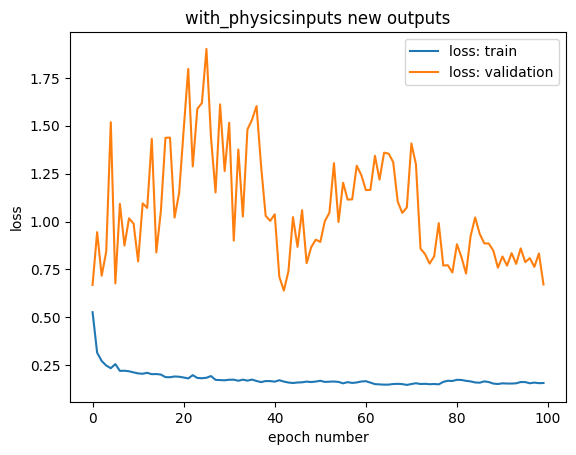

In [8]:
# Plot train/validation loss across epochs.
fit_history = np.load(os.path.join('/content/drive/My Drive/CS230_FinalReport/models/' + EXP_TYPE + '_lstm_newoutputs_transformfix_rawdist_tunedparams_rotonly', 'fit_history.npy') , allow_pickle = True)
fit_history = fit_history.tolist()
plot_title = (EXP_TYPE + ' new outputs')
save_dir = os.path.join(BASE_DIR, 'reports', 'figures', EXP_TYPE + "_lstm_newoutputs_transformfix_rawdist_tunedparams_rotonly", 'training_loss.png')

plt.plot(fit_history['loss'], label='loss: train')
plt.plot(fit_history['val_loss'], label='loss: validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title(plot_title)
plt.legend()
plt.savefig(save_dir)

plt.show()

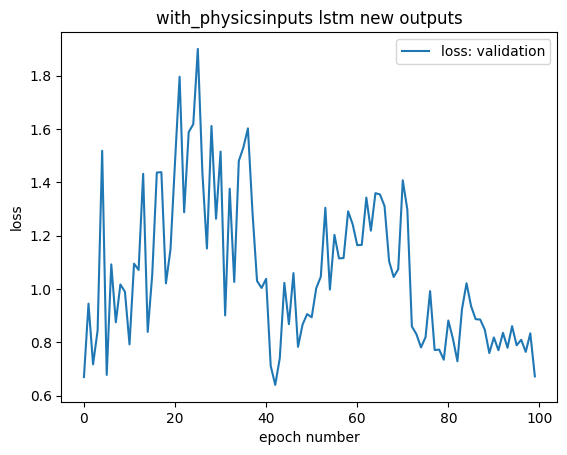

In [9]:
plt.plot(fit_history['val_loss'], label='loss: validation')
plot_title = (EXP_TYPE + ' lstm new outputs')
save_dir = os.path.join(BASE_DIR, 'reports', 'figures', EXP_TYPE + "_lstm_newoutputs_transformfix_rawdist_tunedparams_rotonly", 'training_loss_validationloss.png')

plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title(plot_title)
plt.legend()
plt.savefig(save_dir)

plt.show()